<a href="https://colab.research.google.com/github/imnadiarasheed/Machine-Learning/blob/main/SSDA_P3(OverSampling_CV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import statistics
import missingno as msno
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import VotingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fulldata=pd.read_csv('drive/MyDrive/healthcare-dataset-stroke-data.csv')
fulldata

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Data Preprocessing**

**Outliers Detection**

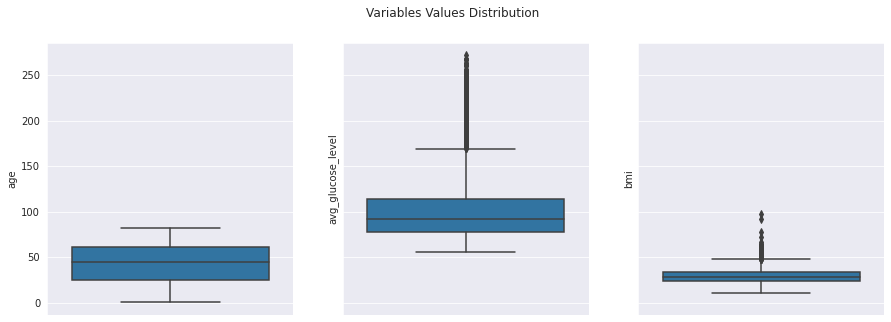

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Variables Values Distribution')

sns.boxplot(ax=axes[0], y=fulldata['age'])

sns.boxplot(ax=axes[1], y=fulldata['avg_glucose_level'])

sns.boxplot(ax=axes[2], y=fulldata['bmi'])

**Outliers Removal**

In [ ]:
glucose_q3 = fulldata["avg_glucose_level"].quantile(0.75)  
glucose_q1 = fulldata["avg_glucose_level"].quantile(0.25)
print(glucose_q3), print(glucose_q1)

glucose_IQR = glucose_q3 - glucose_q1
glucose_low_limit = glucose_q1 - (glucose_IQR * 1.5)
glucose_upp_limit = glucose_q3 + (glucose_IQR * 1.5)

print(glucose_IQR), print(glucose_low_limit), print(glucose_upp_limit)
fulldata['avg_glucose_level'].max(), fulldata['avg_glucose_level'].min()

114.09
77.245
36.845
21.977500000000006
169.35750000000002


(271.74, 55.12)

In [ ]:
fulldata.loc[fulldata['avg_glucose_level'] > glucose_upp_limit, 'avg_glucose_level'] = glucose_upp_limit
fulldata.loc[fulldata['avg_glucose_level'] < glucose_low_limit, 'avg_glucose_level'] = glucose_low_limit
fulldata['avg_glucose_level'].max(), fulldata['avg_glucose_level'].min()

(169.35750000000002, 55.12)

In [ ]:
bmi_q3 = fulldata["bmi"].quantile(0.75)  
bmi_q1 = fulldata["bmi"].quantile(0.25)
print(bmi_q3), print(bmi_q1)

bmi_IQR = bmi_q3 - bmi_q1
bmi_low_limit = bmi_q1 - (bmi_IQR * 1.5)
bmi_upp_limit = bmi_q3 + (bmi_IQR * 1.5)

print(bmi_IQR), print(bmi_low_limit), print(bmi_upp_limit)
fulldata['bmi'].max(), fulldata['bmi'].min()

33.1
23.5
9.600000000000001
9.099999999999998
47.5


(97.6, 10.3)

In [ ]:
fulldata.loc[fulldata['bmi'] > bmi_upp_limit, 'bmi'] = bmi_upp_limit
fulldata.loc[fulldata['bmi'] < bmi_low_limit, 'bmi'] = bmi_low_limit
fulldata['bmi'].max(), fulldata['bmi'].min()

(47.5, 10.3)

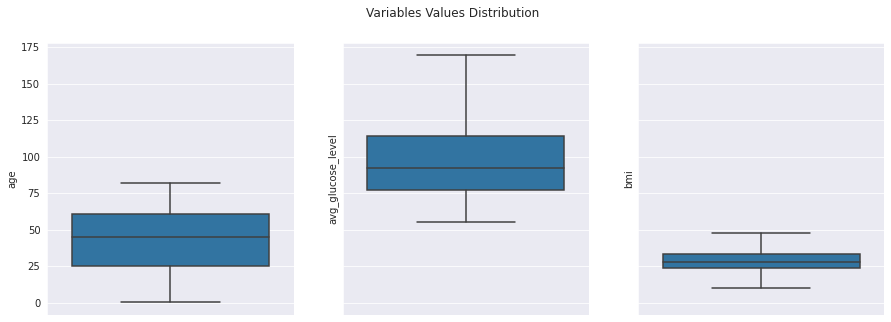

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Variables Values Distribution')

sns.boxplot(ax=axes[0], y=fulldata['age'])

sns.boxplot(ax=axes[1], y=fulldata['avg_glucose_level'])

sns.boxplot(ax=axes[2], y=fulldata['bmi'])

**Data Cleaning**

In [ ]:
fulldata['bmi'].isna().sum()

201

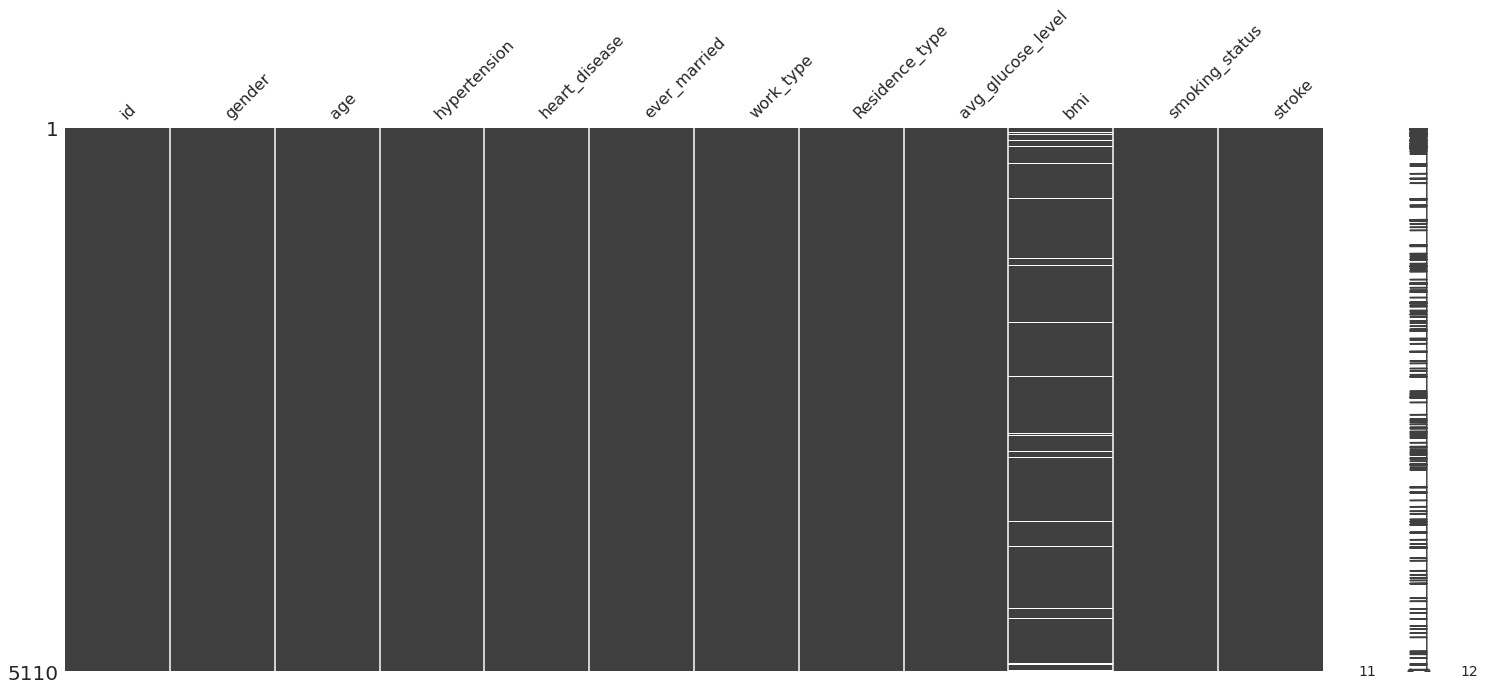

In [ ]:
msno.matrix(fulldata)

In [ ]:
x=fulldata['bmi'].mean()
fulldata['bmi'].fillna(x, inplace=True)
fulldata['bmi'].isna().sum()

0

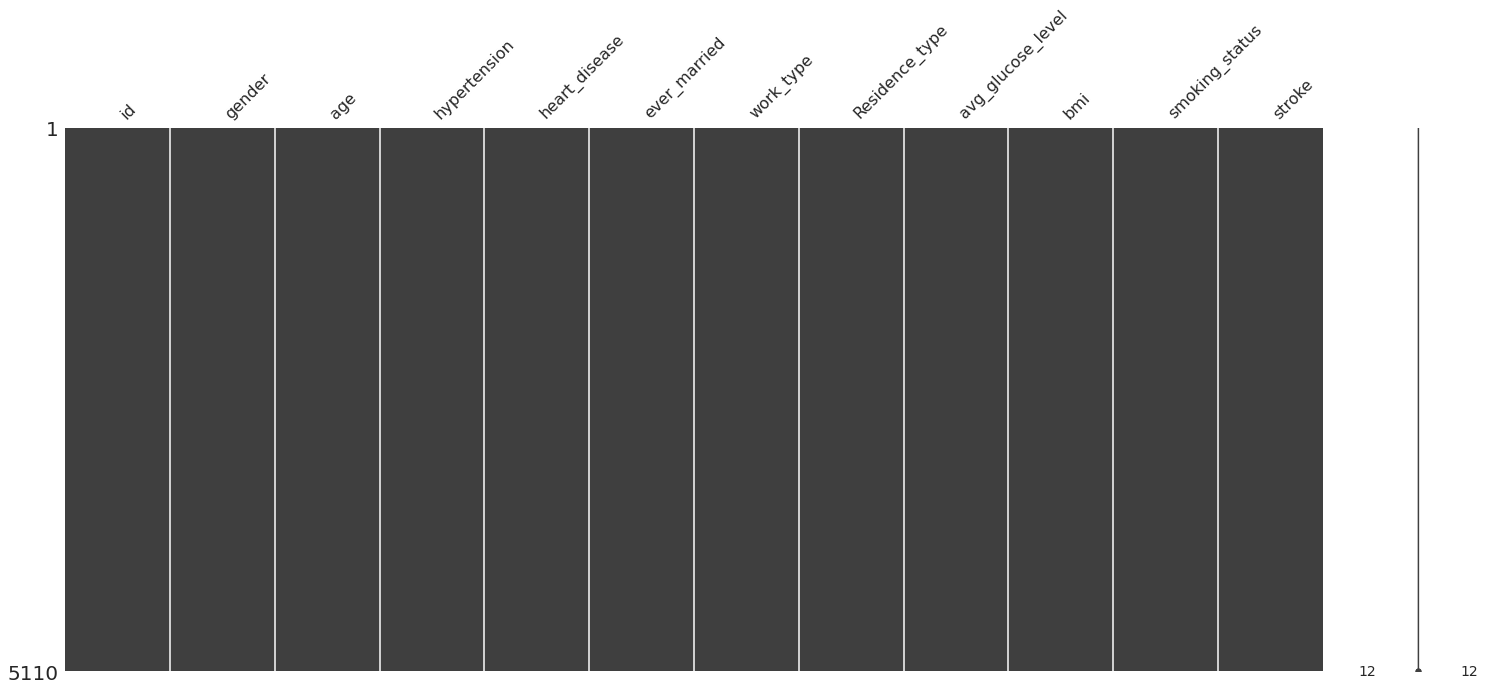

In [ ]:
msno.matrix(fulldata)

**Feature Selection**

In [ ]:
fulldata.drop('id', axis=1, inplace=True)
fulldata.drop('gender', axis=1, inplace=True)
#fulldata.drop('work_type', axis=1, inplace=True)
fulldata.drop('Residence_type', axis=1, inplace=True)
#fulldata.drop('bmi', axis=1, inplace=True)
fulldata.drop('smoking_status', axis=1, inplace=True)

In [ ]:
fulldata

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,stroke
0,67.0,0,1,Yes,Private,169.3575,36.600000,1
1,61.0,0,0,Yes,Self-employed,169.3575,28.743512,1
2,80.0,0,1,Yes,Private,105.9200,32.500000,1
3,49.0,0,0,Yes,Private,169.3575,34.400000,1
4,79.0,1,0,Yes,Self-employed,169.3575,24.000000,1
...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Yes,Private,83.7500,28.743512,0
5106,81.0,0,0,Yes,Self-employed,125.2000,40.000000,0
5107,35.0,0,0,Yes,Self-employed,82.9900,30.600000,0
5108,51.0,0,0,Yes,Private,166.2900,25.600000,0


In [ ]:
fulldata.nunique()

age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
avg_glucose_level    3375
bmi                   345
stroke                  2
dtype: int64

In [ ]:
fulldata.shape

(5110, 8)

**Label Encoding**

In [ ]:
df_numeric = fulldata[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
df_categorical = fulldata[['ever_married', 'work_type']]

In [ ]:
df_categorical_encoded = pd.get_dummies(df_categorical, drop_first=True)
df_categorical_encoded.head()

,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,0,1,0,0
1,1,0,0,1,0
2,1,0,1,0,0
3,1,0,1,0,0
4,1,0,0,1,0


In [ ]:
df_encoded = pd.concat([df_numeric, df_categorical_encoded], axis=1)
df_encoded.shape

(5110, 11)

In [ ]:
df_encoded.nunique()

age                         104
hypertension                  2
heart_disease                 2
avg_glucose_level          3375
bmi                         345
stroke                        2
ever_married_Yes              2
work_type_Never_worked        2
work_type_Private             2
work_type_Self-employed       2
work_type_children            2
dtype: int64

**Import the independent and dependent variable**

In [ ]:
xx = df_encoded.drop('stroke', axis=1)
yy = df_encoded['stroke']

In [ ]:
print(xx.shape), print(yy.shape)

(5110, 10)
(5110,)


(None, None)

**Handling Imbalanced Data**

In [ ]:
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(xx, yy)
print(X_res.shape), print(y_res.shape)

(9722, 10)
(9722,)


(None, None)

In [ ]:
print(y_res.value_counts())

1    4861
0    4861
Name: stroke, dtype: int64


In [ ]:
X_res

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,67.0,0,1,169.3575,36.600000,1,0,1,0,0
1,61.0,0,0,169.3575,28.743512,1,0,0,1,0
2,80.0,0,1,105.9200,32.500000,1,0,1,0,0
3,49.0,0,0,169.3575,34.400000,1,0,1,0,0
4,79.0,1,0,169.3575,24.000000,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
9717,50.0,0,0,102.1600,31.400000,1,0,1,0,0
9718,78.0,0,0,169.3575,26.800000,1,0,0,1,0
9719,79.0,1,1,60.9400,28.743512,0,0,0,1,0
9720,76.0,1,0,169.3575,33.600000,1,0,1,0,0


**Feature Scaling**

In [ ]:
sc = StandardScaler()
X_res = sc.fit_transform(X_res)
X_res

array([[ 0.54287675, -0.45886717,  2.75331783, ...,  0.84733191,
        -0.51739843, -0.28450457],
       [ 0.27392813, -0.45886717, -0.36319817, ..., -1.18017507,
         1.93274649, -0.28450457],
       [ 1.12559877, -0.45886717,  2.75331783, ...,  0.84733191,
        -0.51739843, -0.28450457],
       ...,
       [ 1.080774  ,  2.17927988,  2.75331783, ..., -1.18017507,
         1.93274649, -0.28450457],
       [ 0.94629969,  2.17927988, -0.36319817, ...,  0.84733191,
        -0.51739843, -0.28450457],
       [ 0.76700061, -0.45886717, -0.36319817, ...,  0.84733191,
        -0.51739843, -0.28450457]])

**Training and Testing using K-Fold Cross Validation**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

stratifiedkf=StratifiedKFold(n_splits=10)
score1=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score1))
print("Average Cross Validation score :{}".format(score1.mean()))
accuracy1=score1.mean()
#print(accuracy1)

Cross Validation Scores are [0.77081192 0.77903392 0.74382716 0.77777778 0.74176955 0.76954733
 0.77366255 0.78292181 0.80761317 0.78497942]
Average Cross Validation score :0.773194460304772


Text(0, 0.5, 'Accuracy Rate')

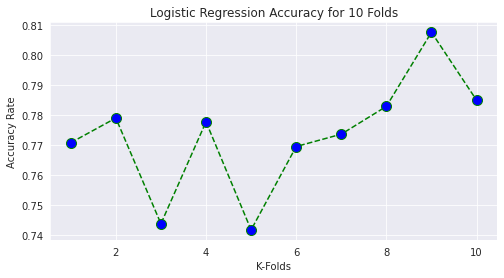

In [ ]:
pltacc1=np.asarray(score1)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc1, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Logistic Regression Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**SVM**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

stratifiedkf=StratifiedKFold(n_splits=10)
score2=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score2))
print("Average Cross Validation score :{}".format(score2.mean()))
accuracy2=score2.mean()
#print(accuracy2)

Cross Validation Scores are [0.78211716 0.78211716 0.75308642 0.77366255 0.73868313 0.76234568
 0.76748971 0.78703704 0.79938272 0.7808642 ]
Average Cross Validation score :0.7726785767153472


Text(0, 0.5, 'Accuracy Rate')

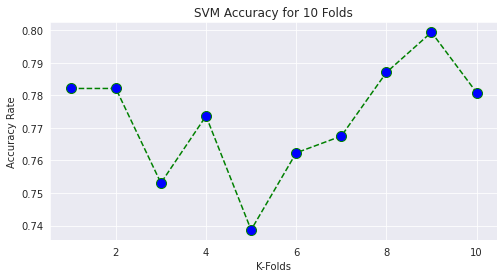

In [ ]:
pltacc2=np.asarray(score2)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc2, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('SVM Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)

stratifiedkf=StratifiedKFold(n_splits=10)
score3=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score3))
print("Average Cross Validation score :{}".format(score3.mean()))
accuracy3=score3.mean()
#print(accuracy3)

Cross Validation Scores are [0.96916752 0.97738952 0.98045267 0.97530864 0.9691358  0.97427984
 0.97633745 0.97736626 0.97736626 0.97427984]
Average Cross Validation score :0.9751083789053412


Text(0, 0.5, 'Accuracy Rate')

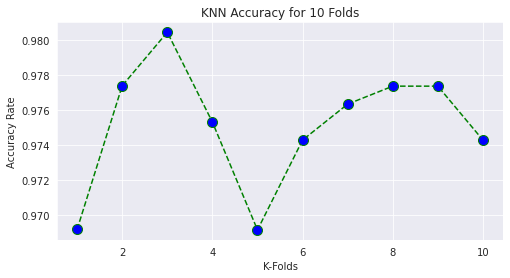

In [ ]:
pltacc3=np.asarray(score3)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc3, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('KNN Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()

stratifiedkf=StratifiedKFold(n_splits=10)
score4=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score4))
print("Average Cross Validation score :{}".format(score4.mean()))
accuracy4=score4.mean()
#print(accuracy4)

Cross Validation Scores are [0.76156218 0.76772867 0.73971193 0.75411523 0.71193416 0.73868313
 0.74794239 0.7654321  0.77572016 0.75617284]
Average Cross Validation score :0.7519002787188238


Text(0, 0.5, 'Accuracy Rate')

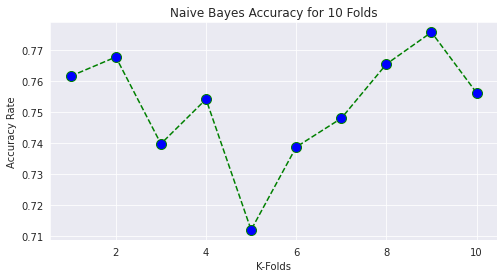

In [ ]:
pltacc4=np.asarray(score4)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc4, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Naive Bayes Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=25)

stratifiedkf=StratifiedKFold(n_splits=10)
score5=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score5))
print("Average Cross Validation score :{}".format(score5.mean()))
accuracy5=score5.mean()
#print(accuracy5)

Cross Validation Scores are [0.96711202 0.98252826 0.98045267 0.97839506 0.97427984 0.96604938
 0.968107   0.97119342 0.97119342 0.97633745]
Average Cross Validation score :0.9735648518222458


Text(0, 0.5, 'Accuracy Rate')

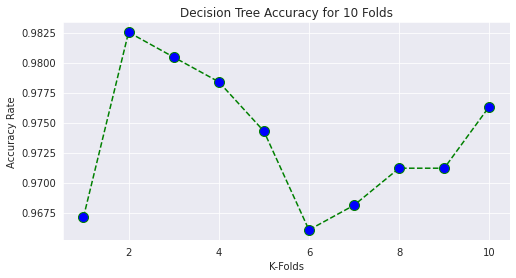

In [ ]:
pltacc5=np.asarray(score5)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc5, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Decision Tree Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)

stratifiedkf=StratifiedKFold(n_splits=10)
score6=cross_val_score(classifier,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score6))
print("Average Cross Validation score :{}".format(score6.mean()))
accuracy6=score6.mean()
#print(accuracy6)

Cross Validation Scores are [0.98150051 0.98972251 0.98971193 0.98868313 0.98353909 0.98868313
 0.99588477 0.99588477 0.99279835 0.9845679 ]
Average Cross Validation score :0.9890976108002487


Text(0, 0.5, 'Accuracy Rate')

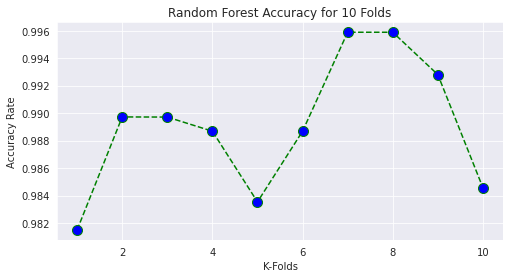

In [ ]:
pltacc6=np.asarray(score6)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc6, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Random Forest Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**Ensemble Method (3 Folds)**

In [ ]:
# Training classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
clf1 = DecisionTreeClassifier(max_depth=25)
clf2 = KNeighborsClassifier(n_neighbors=1)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2)], voting='hard')

stratifiedkf=StratifiedKFold(n_splits=3)
score73=cross_val_score(eclf,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score73))
print("Average Cross Validation score :{}".format(score73.mean()))
accuracy73=score73.mean()
#print(accuracy73)

Cross Validation Scores are [0.98364702 0.98765813 0.99228395]
Average Cross Validation score :0.9878630344493075


**Ensemble Method (5 Folds)**

In [ ]:
# Training classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
clf1 = DecisionTreeClassifier(max_depth=25)
clf2 = KNeighborsClassifier(n_neighbors=1)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2)], voting='hard')

stratifiedkf=StratifiedKFold(n_splits=5)
score75=cross_val_score(eclf,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score75))
print("Average Cross Validation score :{}".format(score75.mean()))
accuracy75=score75.mean()
#print(accuracy75)

Cross Validation Scores are [0.98303342 0.9933162  0.98971193 0.99228395 0.99228395]
Average Cross Validation score :0.9901258899573667


**Ensemble Method (7 Folds)**

In [ ]:
# Training classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
clf1 = DecisionTreeClassifier(max_depth=25)
clf2 = KNeighborsClassifier(n_neighbors=1)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2)], voting='hard')

stratifiedkf=StratifiedKFold(n_splits=7)
score77=cross_val_score(eclf,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score77))
print("Average Cross Validation score :{}".format(score77.mean()))
accuracy77=score77.mean()
#print(accuracy77)

Cross Validation Scores are [0.98344132 0.99712023 0.99424046 0.98920086 0.98920086 0.99568035
 0.99351585]
Average Cross Validation score :0.9917714199167073


**Ensemble Method (10 Folds)**

In [ ]:
# Training classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
clf1 = DecisionTreeClassifier(max_depth=25)
clf2 = KNeighborsClassifier(n_neighbors=1)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2)], voting='hard')

stratifiedkf=StratifiedKFold(n_splits=10)
score710=cross_val_score(eclf,X_res,y_res,cv=stratifiedkf)

print("Cross Validation Scores are {}".format(score710))
print("Average Cross Validation score :{}".format(score710.mean()))
accuracy710=score710.mean()
#print(accuracy710)

Cross Validation Scores are [0.98458376 0.99177801 0.99588477 0.99485597 0.98971193 0.99485597
 0.99279835 0.99279835 0.99485597 0.99074074]
Average Cross Validation score :0.9922863825341842


Text(0, 0.5, 'Accuracy Rate')

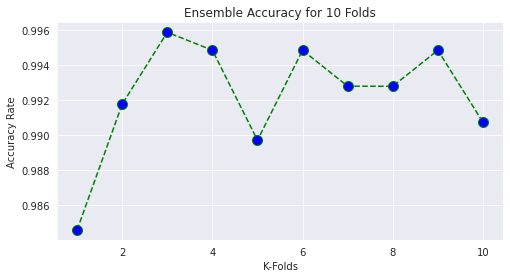

In [ ]:
pltacc710=np.asarray(score710)
rangevalue=np.array([1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(8, 4))
plt.plot(rangevalue, pltacc710, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Ensemble Accuracy for 10 Folds')
plt.xlabel('K-Folds')
plt.ylabel('Accuracy Rate')

**Create visualization for all model with their Accuracy**

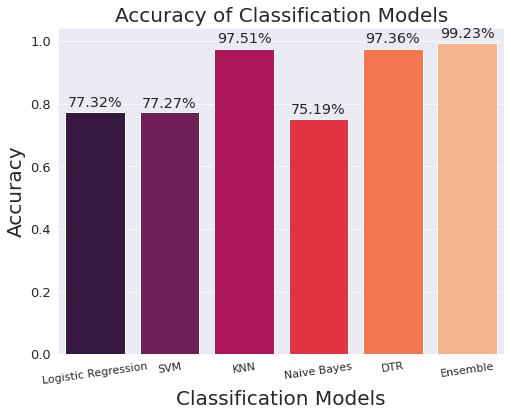

In [ ]:
mylist=[]
mylist2=[]
mylist.append(accuracy1)
mylist2.append("Logistic Regression")
mylist.append(accuracy2)
mylist2.append("SVM")
mylist.append(accuracy3)
mylist2.append("KNN")
mylist.append(accuracy4)
mylist2.append("Naive Bayes")
mylist.append(accuracy5)
mylist2.append("DTR")
#mylist.append(accuracy6)
#mylist2.append("Random Forest")
mylist.append(accuracy710)
mylist2.append("Ensemble")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()